# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

​The UCI Bank Marketing dataset encompasses data from multiple direct marketing campaigns conducted by a Portuguese banking institution between May 2008 and November 2010. While the dataset includes variables such as campaign (number of contacts during the current campaign) and previous (number of contacts before this campaign), indicating multiple campaigns, the exact number of distinct campaigns is not explicitly stated in the dataset documentation. Therefore, the dataset reflects the outcomes of several marketing campaigns over the specified period, but the precise count of distinct campaigns is not provided.

The calculation in problem 2 suggests there can be about 50 campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd

In [3]:
bank_additional_full_df = pd.read_csv('sample_data/bank-additional-full.csv', sep = ';')

In [4]:
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Check number of rows and columns of the dataset **

In [5]:

bank_additional_full_df.shape

(41188, 21)

In [6]:
# The UCI Bank Marketing dataset encompasses data from multiple direct marketing campaigns conducted by a Portuguese banking institution between May 2008 and November 2010. While the dataset includes variables such as campaign (number of contacts during the current campaign) and previous (number of contacts before this campaign), indicating multiple campaigns, the exact number of distinct campaigns is not explicitly stated in the dataset documentation. Therefore, the dataset reflects the outcomes of several marketing campaigns over the specified period, but the precise count of distinct campaigns is not provided.
unique_months = bank_additional_full_df['month'].unique()
print(f"Distinct campaign months: {len(unique_months)}")
print("Months:", unique_months)

distinct_campaigns = bank_additional_full_df[['month', 'day_of_week']].drop_duplicates()
print(f"Estimated number of distinct campaign windows: {distinct_campaigns.shape[0]}")


Distinct campaign months: 10
Months: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Estimated number of distinct campaign windows: 50


In [7]:
bank_additional_full_df['campaign'].nunique()


42

In [8]:
unique_months = bank_additional_full_df['month'].unique()
print(f"Distinct campaign months: {len(unique_months)}")
print("Months:", unique_months)

Distinct campaign months: 10
Months: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [9]:
distinct_campaigns = bank_additional_full_df[['month', 'day_of_week']].drop_duplicates()
print(f"Estimated number of distinct campaign windows: {distinct_campaigns.shape[0]}")


Estimated number of distinct campaign windows: 50


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Step 1: Check for Missing Values
In this dataset:

There are no explicit NaN or nulls in the CSV.

However, some categorical variables use 'unknown' as a placeholder for missing data, which you should treat as missing or uncertain values.

These columns may have 'unknown' values:
job

marital

education

default

housing

loan

Check for "unknown" values in these columns:

In [10]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    print(f"{col}: {bank_additional_full_df[col].value_counts().get('unknown', 0)} unknowns")


job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns


Step 2: Check for Data Types Needing Coercion

In [11]:
print(bank_additional_full_df.dtypes)


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


Special Notes:
Column duration: should be excluded for realistic modeling (as per the dataset description), because it leaks information about the target.

Column pdays: 999 is a placeholder for "not previously contacted". You can optionally treat it as a special category or replace it with NaN:


**Data Type Conversion for meaningfulness:**

In [12]:
bank_additional_full_df['pdays'] = bank_additional_full_df['pdays'].replace(999, np.nan)


Columns like default, housing, and loan contain categorical values 'yes', 'no', and sometimes 'unknown', and they can be converted 'yes' to 1, 'no' to 0, and optionally 'unknown' to np.nan (missing).

**Data Type Conversion from String to Integer**
Some models can take only numeric data types.

In [13]:
import numpy as np

for col in ['default', 'housing', 'loan']:
    bank_additional_full_df[col] = bank_additional_full_df[col].map({'yes': 1, 'no': 0, 'unknown': np.nan})


In [14]:
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Recheck shape of Dataframe after an operation

In [15]:
bank_additional_full_df.shape

(41188, 21)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective:**

The goal of this task is to predict whether a client will subscribe to a term deposit based on historical marketing data collected by a Portuguese bank. By building and comparing multiple classification models (K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines), the bank aims to:

Optimize future marketing campaigns by identifying clients who are more likely to respond positively, thereby increasing conversion rates and reducing costs associated with ineffective contacts.

Key Points:

1. Target variable: y (yes/no — did the client subscribe to a term deposit?)

2. Use case: Improve efficiency of telemarketing efforts by focusing on clients with higher predicted likelihood of subscription.

3. Benefit: Better resource allocation, improved ROI, and more personalized client targeting.

In [16]:
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

month – Last contact month
Values: 'jan', 'feb', ..., 'dec'

Transformation Options:

In [17]:
month_order = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
               'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
bank_additional_full_df['month'] = bank_additional_full_df['month'].map(month_order)


contact – Communication type
Values: 'cellular', 'telephone'

Transformation: Binary encoding

In [18]:
bank_additional_full_df['contact'] = bank_additional_full_df['contact'].map({'cellular': 1, 'telephone': 0})


day_of_week – Last contact day of the week
Values: 'mon', 'tue', 'wed', 'thu', 'fri'

Transformation Options:

In [19]:
day_order = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
bank_additional_full_df['day_of_week'] = bank_additional_full_df['day_of_week'].map(day_order)


In [20]:
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,0,5,1,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,0.0,0.0,0,5,1,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0.0,1.0,0.0,0,5,1,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0.0,0.0,0.0,0,5,1,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0.0,0.0,1.0,0,5,1,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Create Marital Encoded Column in a new DF**

In [22]:
# Copy the original DataFrame
bank_additional_full_marital_encoded = bank_additional_full_df.copy()
# Add encoded marital column
bank_additional_full_marital_encoded = pd.get_dummies(bank_additional_full_df, columns=['marital'], drop_first=True)





In [23]:
bank_additional_full_marital_encoded.info()
bank_additional_full_marital_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   education        41188 non-null  object 
 3   default          32591 non-null  float64
 4   housing          40198 non-null  float64
 5   loan             40198 non-null  float64
 6   contact          41188 non-null  int64  
 7   month            41188 non-null  int64  
 8   day_of_week      41188 non-null  int64  
 9   duration         41188 non-null  int64  
 10  campaign         41188 non-null  int64  
 11  pdays            1515 non-null   float64
 12  previous         41188 non-null  int64  
 13  poutcome         41188 non-null  object 
 14  emp.var.rate     41188 non-null  float64
 15  cons.price.idx   41188 non-null  float64
 16  cons.conf.idx    41188 non-null  float64
 17  euribor3m   

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single,marital_unknown
0,56,housemaid,basic.4y,0.0,0.0,0.0,0,5,1,261,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False
1,57,services,high.school,NaN,0.0,0.0,0,5,1,149,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False
2,37,services,high.school,0.0,1.0,0.0,0,5,1,226,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False
3,40,admin.,basic.6y,0.0,0.0,0.0,0,5,1,151,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False
4,56,services,high.school,0.0,0.0,1.0,0,5,1,307,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False


**Handle Hierarchical Values in "job" column**

the job categories in the dataset suggest a natural hierarchy or socioeconomic order (e.g., "student" → "blue-collar" → "technician" → "management" → "retired").

If we want our model to understand the relative rank or socioeconomic order of jobs, a hierarchical ordinal encoding can be more meaningful — especially for linear models like Logistic Regression, SVM.


In [24]:
# cleaner way is to create the hierarchy and save in a separate variable

job_hierarchy = {
    'student': 0,
    'unemployed': 1,
    'housemaid': 2,
    'blue-collar': 3,
    'services': 4,
    'self-employed': 5,
    'entrepreneur': 6,
    'technician': 7,
    'management': 8,
    'retired': 9,
    'unknown': -1  # treat as lowest or missing
}

# create a job encoded column. Copy the original DataFrame
bank_additional_job_encoded_df = bank_additional_full_marital_encoded.copy()
# Replace original values with a single ordinal numeric column:
bank_additional_job_encoded_df['job_encoded'] = bank_additional_full_marital_encoded['job'].map(job_hierarchy)


**Checking Transformed "job" column**

In [25]:
bank_additional_job_encoded_df.info()
bank_additional_job_encoded_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   education        41188 non-null  object 
 3   default          32591 non-null  float64
 4   housing          40198 non-null  float64
 5   loan             40198 non-null  float64
 6   contact          41188 non-null  int64  
 7   month            41188 non-null  int64  
 8   day_of_week      41188 non-null  int64  
 9   duration         41188 non-null  int64  
 10  campaign         41188 non-null  int64  
 11  pdays            1515 non-null   float64
 12  previous         41188 non-null  int64  
 13  poutcome         41188 non-null  object 
 14  emp.var.rate     41188 non-null  float64
 15  cons.price.idx   41188 non-null  float64
 16  cons.conf.idx    41188 non-null  float64
 17  euribor3m   

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single,marital_unknown,job_encoded
0,56,housemaid,basic.4y,0.0,0.0,0.0,0,5,1,261,...,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False,2.0
1,57,services,high.school,NaN,0.0,0.0,0,5,1,149,...,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False,4.0
2,37,services,high.school,0.0,1.0,0.0,0,5,1,226,...,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False,4.0
3,40,admin.,basic.6y,0.0,0.0,0.0,0,5,1,151,...,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False,NaN
4,56,services,high.school,0.0,0.0,1.0,0,5,1,307,...,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False,4.0


**Ordinal Encoding for "Education" Column**

In [26]:
# Define the hierarchy. This is a reasonable order from least to most education:
education_hierarchy = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': -1  # or use np.nan if you want to treat as missing
}

In [27]:
# Create a copy of the previous dataframe with job encoded
bank_additional_edu_encoded_df = bank_additional_job_encoded_df.copy()

# Apply the ordinal encoding
bank_additional_edu_encoded_df['education_encoded'] = bank_additional_edu_encoded_df['education'].map(education_hierarchy)


**Checking Education Encoded Column**

In [28]:
bank_additional_edu_encoded_df[['education', 'education_encoded']].head()


,education,education_encoded
0,basic.4y,1
1,high.school,4
2,high.school,4
3,basic.6y,2
4,high.school,4


In [29]:
bank_additional_edu_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  object 
 2   education          41188 non-null  object 
 3   default            32591 non-null  float64
 4   housing            40198 non-null  float64
 5   loan               40198 non-null  float64
 6   contact            41188 non-null  int64  
 7   month              41188 non-null  int64  
 8   day_of_week        41188 non-null  int64  
 9   duration           41188 non-null  int64  
 10  campaign           41188 non-null  int64  
 11  pdays              1515 non-null   float64
 12  previous           41188 non-null  int64  
 13  poutcome           41188 non-null  object 
 14  emp.var.rate       41188 non-null  float64
 15  cons.price.idx     41188 non-null  float64
 16  cons.conf.idx      411

In [30]:
bank_additional_edu_encoded_df.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single,marital_unknown,job_encoded,education_encoded
0,56,housemaid,basic.4y,0.0,0.0,0.0,0,5,1,261,...,93.994,-36.4,4.857,5191.0,no,True,False,False,2.0,1
1,57,services,high.school,NaN,0.0,0.0,0,5,1,149,...,93.994,-36.4,4.857,5191.0,no,True,False,False,4.0,4
2,37,services,high.school,0.0,1.0,0.0,0,5,1,226,...,93.994,-36.4,4.857,5191.0,no,True,False,False,4.0,4
3,40,admin.,basic.6y,0.0,0.0,0.0,0,5,1,151,...,93.994,-36.4,4.857,5191.0,no,True,False,False,NaN,2
4,56,services,high.school,0.0,0.0,1.0,0,5,1,307,...,93.994,-36.4,4.857,5191.0,no,True,False,False,4.0,4


**Converting "poutcome" to numeric. **
This is previous outcome and has 3 types of values.
Values: 'failure', 'nonexistent', 'success'
This is a categorical feature with implied order:

'failure' < 'nonexistent' < 'success'

This treats it as ordered outcomes — which makes sense in a marketing context e.g., if someone succeeded before, they're more likely to convert again.

In [31]:
bank_all_features_numerics_df = bank_additional_edu_encoded_df.copy()
poutcome_mapping = {
    'failure': 0,
    'nonexistent': 1,
    'success': 2
}

bank_all_features_numerics_df['poutcome_encoded'] = bank_additional_edu_encoded_df['poutcome'].map(poutcome_mapping)

In [32]:
bank_all_features_with_target_numerics_df = bank_all_features_numerics_df.copy()
bank_all_features_with_target_numerics_df['y_encoded'] = bank_all_features_numerics_df['y'].map({'yes': 1, 'no': 0})


In [33]:
bank_all_features_with_target_numerics_df[['y', 'y_encoded']].head()

,y,y_encoded
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [34]:
bank_all_features_with_target_numerics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  object 
 2   education          41188 non-null  object 
 3   default            32591 non-null  float64
 4   housing            40198 non-null  float64
 5   loan               40198 non-null  float64
 6   contact            41188 non-null  int64  
 7   month              41188 non-null  int64  
 8   day_of_week        41188 non-null  int64  
 9   duration           41188 non-null  int64  
 10  campaign           41188 non-null  int64  
 11  pdays              1515 non-null   float64
 12  previous           41188 non-null  int64  
 13  poutcome           41188 non-null  object 
 14  emp.var.rate       41188 non-null  float64
 15  cons.price.idx     41188 non-null  float64
 16  cons.conf.idx      411

In [35]:
bank_all_features_with_target_numerics_df.shape

(41188, 27)

**Check what columns have how many null values**

In [36]:
missing_counts = bank_all_features_with_target_numerics_df.isnull().sum()
missing_counts[missing_counts > 0]

,0
default,8597
housing,990
loan,990
pdays,39673
job_encoded,10422


Missing Value Summary:

Column	Missing Count	% Missing (approx)	Recommendation


default	8,597	~20.9%	 Consider imputing or dropping

housing	990	~2.4%	 Impute (mode or most frequent)

loan	990	~2.4%	 Impute (mode or most frequent)

pdays	39,673	~96.3%  Consider dropping or re-encoding

job_encoded	10,422	~25.3%  Consider imputing or revisiting how job was encoded

Housing and loan
Low missingness → just fill with mode (0 or 1)

mode() is a pandas function that returns the most frequent value(s) in a Series (i.e., the "mode").

The result of mode() is always a Series, because there can be more than one mode (if two or more values have the same highest frequency).

mode()[0] returns the first most common value.



In [37]:
for col in ['housing', 'loan']:
    mode_val = bank_all_features_with_target_numerics_df[col].mode()[0]
    bank_all_features_with_target_numerics_df[col] = bank_all_features_with_target_numerics_df[col].fillna(mode_val)



**How to handle "default" column's missing values?**

It is another important column for modeling loan offer because it determines risk assessment for paying off loans.
It has 20% null values. It is so important that will it be good idea to impute it with synthetic values?

This is a fantastic, nuanced question—and it comes up a lot in real-world modeling.
Imputation Options for default:
A. Mode Imputation (most common value)
If most customers are not in default, this will fill most missing values as 0 (no default).

Pro: Simple, safe, less likely to inject bias if missingness is random.

Con: May under-represent defaults if missingness isn’t random.

So as a simple valid step, I will impute the missing values with mode.

In [38]:
# Fill missing with mode (usually 0)
mode_default = bank_all_features_with_target_numerics_df['default'].mode()[0]
bank_all_features_with_target_numerics_df['default'] = bank_all_features_with_target_numerics_df['default'].fillna(mode_default)

In [39]:
bank_all_features_with_target_numerics_df['pdays'].value_counts(dropna=False)


,count
pdays,
NaN,39673
3.0,439
6.0,412
4.0,118
9.0,64
2.0,61
7.0,60
12.0,58
10.0,52


In [40]:
bank_all_features_with_target_numerics_df['was_previously_contacted'] = bank_all_features_with_target_numerics_df['pdays'].notna().astype(int)
bank_all_features_with_target_numerics_df[['was_previously_contacted', 'pdays']]

,was_previously_contacted,pdays
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
41183,0,NaN
41184,0,NaN
41185,0,NaN
41186,0,NaN


In [41]:
bank_all_features_with_target_numerics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       41188 non-null  int64  
 1   job                       41188 non-null  object 
 2   education                 41188 non-null  object 
 3   default                   41188 non-null  float64
 4   housing                   41188 non-null  float64
 5   loan                      41188 non-null  float64
 6   contact                   41188 non-null  int64  
 7   month                     41188 non-null  int64  
 8   day_of_week               41188 non-null  int64  
 9   duration                  41188 non-null  int64  
 10  campaign                  41188 non-null  int64  
 11  pdays                     1515 non-null   float64
 12  previous                  41188 non-null  int64  
 13  poutcome                  41188 non-null  object 
 14  emp.va

In [42]:
bank_all_features_with_target_numerics_df['job_encoded'].value_counts(dropna=False)

,count
job_encoded,
NaN,10422
3.0,9254
7.0,6743
4.0,3969
8.0,2924
9.0,1720
6.0,1456
5.0,1421
2.0,1060


**Handle 25% "job_encoded" column null values**

Impute or Flag NaNs
Since 'unknown' jobs are already marked as -1.0, NaN is probably true missing with median values.

In [43]:
bank_all_features_with_target_numerics_df['job_encoded'] = bank_all_features_with_target_numerics_df['job_encoded'].fillna(bank_all_features_with_target_numerics_df['job_encoded'].median())



**Drop the original object columns because they have encoded columns:**

'job' → use 'job_encoded'

'education' → use 'education_encoded'

'poutcome' → use 'poutcome_encoded'

'y' → use 'y_encoded'

'pdays' -> use calculated column 'was_previously_contacted' instead


In [44]:
columns_to_drop = [
    'job', 'education', 'poutcome', 'pdays', 'y'  # object columns
]

bank_ready_df = bank_all_features_with_target_numerics_df.drop(columns=columns_to_drop)


In [45]:
bank_ready_df.shape

(41188, 23)

In [46]:
bank_ready_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       41188 non-null  int64  
 1   default                   41188 non-null  float64
 2   housing                   41188 non-null  float64
 3   loan                      41188 non-null  float64
 4   contact                   41188 non-null  int64  
 5   month                     41188 non-null  int64  
 6   day_of_week               41188 non-null  int64  
 7   duration                  41188 non-null  int64  
 8   campaign                  41188 non-null  int64  
 9   previous                  41188 non-null  int64  
 10  emp.var.rate              41188 non-null  float64
 11  cons.price.idx            41188 non-null  float64
 12  cons.conf.idx             41188 non-null  float64
 13  euribor3m                 41188 non-null  float64
 14  nr.emp

**End of Feature Engineering**

I am concluding feature engineering because:
1. All the features in bank_ready_df are numeric or boolean types.
2. There are no null values.
3. The data is clean and ready for modeling

So, I will work with 22 feature columns + 1 target column.


**Save the final Dataframe for reuse later**

index=False: This prevents pandas from writing row numbers as a separate column.

In [47]:
bank_ready_df.to_csv('bank_ready_features.csv', index=False)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [48]:
from sklearn.model_selection import train_test_split

X = bank_ready_df.drop('y_encoded', axis=1)
y = bank_ready_df['y_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


1. stratify=y keeps class balance across train/test

2. random_state ensures reproducibility


**Scale the dataset**


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [50]:
y_train.value_counts(normalize=True)


,proportion
y_encoded,
0,0.887344
1,0.112656


Baseline Results Analysis

This means 88% of the data is class 0 (“no”), so your baseline accuracy is 88%.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)


In [52]:
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [53]:
y_pred = logreg.predict(X_test_scaled)


### Problem 9: Score the Model

What is the accuracy of your model?

In [54]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.9125

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.69      0.40      0.51       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238


Confusion Matrix:
 [[7147  163]
 [ 558  370]]


**Interpretation of Results:**
Precision: When the model predicts a class, how often is it correct?

Recall: Of all true instances of a class, how many did the model catch?

F1-score: Harmonic mean of precision and recall (balances both).

Support: Number of instances in the true data for that class.

Interpretation:
Class 0 ("No"): The model is very good at identifying clients who won't subscribe (high precision, very high recall).

Class 1 ("Yes"): The model is less effective — it finds less than half of the actual subscribers (recall = 0.40), though when it predicts "yes," it's correct 69% of the time.

7147: Correctly predicted "no"

163: Incorrectly predicted "yes" for clients who actually said "no" (false positives)

558: Incorrectly predicted "no" for clients who actually said "yes" (false negatives)

370: Correctly predicted "yes"

**Perform ROC AUC**

The ROC AUC (Receiver Operating Characteristic – Area Under Curve) is a great metric for evaluating classifiers, especially on imbalanced datasets like this one.

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [56]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 ("yes")


In [57]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc:.4f}")


ROC AUC Score: 0.9339


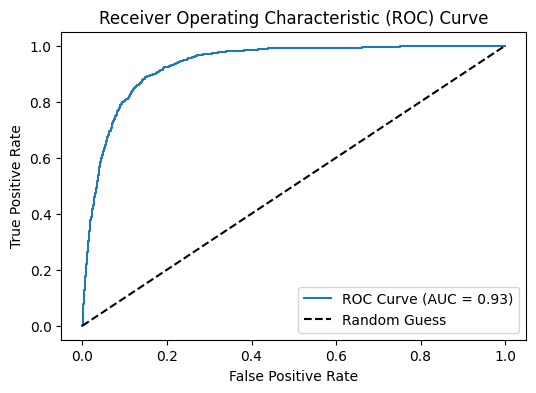

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


X-axis: False Positive Rate (FPR) — proportion of negatives incorrectly classified as positives.

Y-axis: True Positive Rate (TPR), also known as recall or sensitivity — proportion of positives correctly classified.

The blue curve: Shows the tradeoff between TPR and FPR as we vary the classification threshold.
The dashed black line: Represents a random guess (AUC = 0.5).

The Logistic Regression model looks like is pretty good at separating those who will and will not subscribe to a term deposit — much better than random guessing.

This is especially impressive given the class imbalance in your dataset.



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [59]:
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [65]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
# List of models to compare

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
]

results = []

for name, model in models:
    start = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4),
        'Train F1': round(train_f1, 4),
        'Test F1': round(test_f1, 4)
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy  Train F1  \
0  Logistic Regression      0.0921          0.9096         0.9125    0.4987   
1                  KNN      0.0063          0.9285         0.9024    0.6325   
2        Decision Tree      0.1415          1.0000         0.8918    1.0000   
3                  SVM     12.6095          0.9177         0.9141    0.5283   

   Test F1  
0   0.5065  
1   0.4866  
2   0.5288  
3   0.5124  


**Results Analysis**

Logistic Regression: Fast to train, high test accuracy, no overfitting.

KNN: Fastest to train, slight overfitting (train > test), still good generalization.

Decision Tree: Perfect fit on train (overfitting), lowest test accuracy.

SVM: Highest test accuracy, but very slow to train (as is typical for SVM on larger datasets). Also slight overfitting but strong performance.

Best Performing Model:

1. SVM achieves the best test accuracy (0.9141), but is much slower to train.

2. Logistic Regression is nearly as good, with much faster training and slightly better generalization (train ≈ test).

Recommendations:

1. If speed matters: Logistic Regression is ideal for this dataset.

2. If you want the absolute best accuracy and can afford the time: SVM edges out slightly.

3. Decision Trees may require tuning (e.g., max_depth) to avoid overfitting.

4. KNN is quick but slightly less accurate.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**1. Feature Engineering & Exploration**

Q: Should we keep the gender feature? Why or why not?

In the UCI Bank Marketing dataset, there is no explicit gender column. If you created a synthetic one, or if you have it from another source, consider the following:

Legal/Ethical: In many regulated industries (like banking/finance), using gender as a feature can raise ethical and legal concerns regarding discrimination and fairness.

Predictive Value: If included, evaluate its actual predictive power (e.g., via feature importance or correlation).

Best Practice: Unless gender is proven to have strong predictive value and is allowed ethically/legally, it's often best not to include it for customer-facing financial decisions.

**Other feature engineering ideas:**

Feature Selection using Regularization techniques.

Interactions (e.g., combining age with job type)

Binning continuous variables (age groups, pdays recency bins)

One-hot vs ordinal encoding, polynomial features

2. Hyperparameter Tuning & Grid Search
All models can improve with tuning!

KNN: Try different values of n_neighbors ( e.g., 3-20 ).

Decision Tree: Tune max_depth, min_samples_split, min_samples_leaf.

SVM: Try different C and gamma values; experiment with kernels (linear, rbf).

Logistic Regression: Try different regularization strengths (C).

How?

Use GridSearchCV from scikit-learn for cross-validated grid search.

### Grid Search with KNN

In [61]:
from sklearn.model_selection import GridSearchCV

# For KNN
param_grid_knn = {'n_neighbors': range(3, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), scoring='f1', param_grid=param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)
print("Best KNN params:", grid_knn.best_params_)
print("Best KNN score:", grid_knn.best_score_)


Best KNN params: {'n_neighbors': 3}
Best KNN score: 0.4719120810990809


In [64]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn = knn_best.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Test F1-score:", f1_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Test Accuracy: 0.8973051711580481
Test F1-score: 0.4835164835164835
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7310
           1       0.56      0.43      0.48       928

    accuracy                           0.90      8238
   macro avg       0.74      0.69      0.71      8238
weighted avg       0.89      0.90      0.89      8238



In [67]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), scoring='f1', param_grid=param_grid_dt, cv=5)
grid_dt.fit(X_train_scaled, y_train)
print("Best Decision Tree params:", grid_dt.best_params_)
print("Best Decision Tree score:", grid_dt.best_score_)

# Get the best estimator (tuned Decision Tree). best_dt = grid_dt.best_estimator_ fetches your tuned tree:
best_dt = grid_dt.best_estimator_

# Predict on test data
y_pred_dt = best_dt.predict(X_test_scaled)

# Print metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Test F1-score:", f1_score(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Best Decision Tree params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree score: 0.5847033816683316
Test Accuracy: 0.9133284777858703
Test F1-score: 0.6059602649006622

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7310
           1       0.62      0.59      0.61       928

    accuracy                           0.91      8238
   macro avg       0.78      0.77      0.78      8238
weighted avg       0.91      0.91      0.91      8238



In [63]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 0.01, 0.1, 1]
}
grid_svm = GridSearchCV(SVC(random_state=42), scoring='f1', param_grid=param_grid_svm, cv=3)  # 3-fold to save time
grid_svm.fit(X_train_scaled, y_train)
print("Best SVM params:", grid_svm.best_params_)
print("Best SVM score:", grid_svm.best_score_)


KeyboardInterrupt: 

The above code was running forever. So I had to kill it.

**SVM GridSearch Issues**

Above code is running forever.
After researching on the problem I found that SVM grid search is notoriously slow on large datasets, especially with the rbf kernel and multiple gamma/C values. With 8,000+ rows and 24 hyperparameter combinations (3*2*4), and 3-fold CV, that's a lot of fits!
SVC with 'rbf' kernel requires calculation of all pairwise distances in the feature space for every fold/parameter combination, which is computationally expensive for large data.

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, f1_score, classification_report

param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 0.01, 0.1, 1]
}

random_search = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=param_dist,
    n_iter=8,      # Try just 8 combinations
    scoring='f1',
    cv=3,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)
print("Best SVM params:", random_search.best_params_)
print("Best SVM score:", random_search.best_score_)

# Get the best estimator (tuned SVM)
best_svm = random_search.best_estimator_  # If using RandomizedSearchCV
# Or, if you use GridSearchCV, it would be: best_svm = grid_svm.best_estimator_

# Predict on test data
y_pred_svm = best_svm.predict(X_test_scaled)

# Print metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Test F1-score:", f1_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Best SVM params: {'C': np.float64(7.41993941811405), 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM score: 0.49795967319944556
Test Accuracy: 0.9102937606215101
Test F1-score: 0.5204412719013628

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.65      0.43      0.52       928

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



**The above SVM code ran for 1 hr 16 mins.**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), scoring='f1', param_grid=param_grid_lr, cv=5)
grid_lr.fit(X_train_scaled, y_train)
print("Best Logistic Regression params:", grid_lr.best_params_)
print("Best Logistic Regression score:", grid_lr.best_score_)



# After GridSearchCV has been fit. grid_lr.best_estimator_ is your tuned, best-performing Logistic Regression model.:
best_lr = grid_lr.best_estimator_

# Predict on test data
y_pred_lr = best_lr.predict(X_test_scaled)

# Accuracy and F1-score
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Test F1-score:", f1_score(y_test, y_pred_lr))

# Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))



Best Logistic Regression params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression score: 0.4998162596926322
Test Accuracy: 0.9127215343529983
Test F1-score: 0.508544087491456

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.40      0.51       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



### Conclusion regarding Model Choice:

**Model Comparison: Key Metrics (Class 1 = "Yes")**

**Model | Test Accuracy | Test F1 (class 1) | Precision (class 1) | Recall (class 1)**

Decision Tree | 0.913 | 0.61 | 0.62 | 0.59

Logistic Regression | 0.913 | 0.51 | 0.70 | 0.40

SVM | 0.910 | 0.52 | 0.65 | 0.43

KNN | 0.897 | 0.48 | 0.56 | 0.43

**Interpretation:**

All models have high overall accuracy (~91%), but this is driven by the majority "no" class.

Decision Tree stands out with the highest F1-score for the minority "yes" class (0.61) and the best recall (0.59).

Precision for class 1 is highest in Logistic Regression (0.70), but its recall is much lower (0.40). This means LR is more "conservative" and misses more "yes" cases.

KNN lags behind the others in both overall accuracy and class 1 performance.


**Which model is the best?**

If our business goal is finding as many “yes” customers as possible (i.e., maximizing recall and F1 for class 1), the Decision Tree model is the winner here.

If we care more about being very sure when we say “yes” (precision), Logistic Regression has an edge, but at the cost of missing a lot of actual "yes" cases.

### Next Steps
**Feature importance: **

Use the Decision Tree's feature_importances_ to see what's driving decisions.

**Error analysis:**

Examine which "yes" cases were missed (False Negatives) to look for feature patterns.

**Feedback loop:**

Implement a feedback mechanism to keep improving the model over time.

**Lets check Feature Importances first.**

In [69]:
importances = best_dt.feature_importances_
feature_names = X.columns  # Or whatever you used
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi_df.sort_values('importance', ascending=False, inplace=True)
print(fi_df)


                     feature  importance
7                   duration    0.531085
14               nr.employed    0.397126
12             cons.conf.idx    0.036424
21  was_previously_contacted    0.035365
0                        age    0.000000
1                    default    0.000000
5                      month    0.000000
4                    contact    0.000000
3                       loan    0.000000
2                    housing    0.000000
9                   previous    0.000000
10              emp.var.rate    0.000000
8                   campaign    0.000000
6                day_of_week    0.000000
13                 euribor3m    0.000000
11            cons.price.idx    0.000000
16            marital_single    0.000000
15           marital_married    0.000000
17           marital_unknown    0.000000
18               job_encoded    0.000000
19         education_encoded    0.000000
20          poutcome_encoded    0.000000


Interpretation of Results:

The above results reveal a classic pattern — a few features dominate the Decision Tree's decision-making especially since the tree we used is a shallow tree, and many others are ignored (importance = 0).
Check with business stakeholders to manually get their interpretation about the above important features chosed by the Decision Tree to make sure they agree.

**Check for feature importance or feature coefficients for the best Logistic Regression**

It helps to understand what influences predictions in a linear, more interpretable way (especially valuable for business stakeholders)

In [72]:
import numpy as np
import pandas as pd

# Assuming best_lr is your fitted logistic regression model
coefs = best_lr.coef_[0]
features = X.columns  # Or whatever your features variable is

coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': coefs,
    'abs_coefficient': np.abs(coefs)
}).sort_values('abs_coefficient', ascending=False)

print(coef_df)


                     feature  coefficient  abs_coefficient
10              emp.var.rate    -1.492527         1.492527
7                   duration     1.156819         1.156819
11            cons.price.idx     0.693329         0.693329
4                    contact     0.507045         0.507045
13                 euribor3m     0.464131         0.464131
14               nr.employed    -0.338495         0.338495
12             cons.conf.idx     0.252533         0.252533
21  was_previously_contacted     0.209213         0.209213
20          poutcome_encoded     0.151551         0.151551
5                      month    -0.100598         0.100598
8                   campaign    -0.088294         0.088294
16            marital_single     0.086667         0.086667
19         education_encoded     0.074801         0.074801
18               job_encoded     0.061059         0.061059
0                        age     0.051527         0.051527
1                    default    -0.049223         0.0492

**Analysis of important features out of Logistic Regression Model**

**Key Observations:**

duration is again among the strongest features (same as in the Decision Tree).

Macroeconomic features (emp.var.rate, cons.price.idx, nr.employed, euribor3m) are all highly predictive.

Customer contact history and method (was_previously_contacted, contact) have meaningful, positive impacts.

Categorical encodings (job, education, marital, etc.) have much smaller coefficients—suggesting their impact is less, but not zero (unlike in the shallow Decision Tree).



**Prediction Error Analysis**

Use the best Decision Tree model to predict test dataset and capture the records that were predicted wrong labels.

In [70]:
import numpy as np
y_pred = best_dt.predict(X_test)
fn_idx = np.where((y_test == 1) & (y_pred == 0))[0]
fp_idx = np.where((y_test == 0) & (y_pred == 1))[0]
print("False Negatives (missed yes):", X_test.iloc[fn_idx])
print("False Positives (wrong yes):", X_test.iloc[fp_idx])


False Negatives (missed yes): Empty DataFrame
Columns: [age, default, housing, loan, contact, month, day_of_week, duration, campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, marital_married, marital_single, marital_unknown, job_encoded, education_encoded, poutcome_encoded, was_previously_contacted]
Index: []

[0 rows x 22 columns]
False Positives (wrong yes):        age  default  housing  loan  contact  month  day_of_week  duration  \
14455   32      0.0      0.0   0.0        1      7            2       131   
36380   37      0.0      0.0   0.0        1      6            2       100   
40076   73      0.0      1.0   0.0        1      7            4       131   
10778   44      0.0      0.0   0.0        0      6            2        48   
27939   28      0.0      0.0   0.0        1      3            5       144   
...    ...      ...      ...   ...      ...    ...          ...       ...   
2954    42      0.0      0.0   0.0        0      5          

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [73]:
# Add true and predicted labels for context
false_negatives = X_test.iloc[fn_idx].copy()
false_negatives['true_label'] = y_test.iloc[fn_idx].values
false_negatives['predicted'] = y_pred[fn_idx]

false_positives = X_test.iloc[fp_idx].copy()
false_positives['true_label'] = y_test.iloc[fp_idx].values
false_positives['predicted'] = y_pred[fp_idx]

# Save to CSV
false_negatives.to_csv('false_negatives.csv', index=False)
false_positives.to_csv('false_positives.csv', index=False)


### Conlusion of Error Analysis

Label encoding done in above cell confirms 'yes' → 1, 'no' → 0
bank_all_features_with_target_numerics_df = bank_all_features_numerics_df.copy()
bank_all_features_with_target_numerics_df['y_encoded'] = bank_all_features_numerics_df['y'].map({'yes': 1, 'no': 0})

**Summary of the Best DT Model's Behavior**

1. False negatives file is empty means the model didn't miss any of the "yes" cases. True “yes” customers (y=1) are always caught by the model (recall = 1.0 for class 1).

2. All mistakes are false positives (model predicted “yes” for some “no” cases). This means conversion rate is not the best which indicates customer service will make more contacts than needed.



In [74]:
from sklearn.metrics import precision_score, recall_score

print("Recall (class 1):", recall_score(y_test, y_pred))
print("Precision (class 1):", precision_score(y_test, y_pred))


Recall (class 1): 1.0
Precision (class 1): 0.11264870114105366


**Result Means:**
With threshold 0.5:

Recall = 1.0:

The model predicted "yes" for every actual "yes" — no false negatives.

Precision = 0.11:

Only ~11% of the "yes" predictions were correct. Most were false positives.

The default probalility was 0.5. If the probability is higher than 0.5 Decision Tree predicted "yes". So, lets increase custom threshold to 0.7.

In [77]:
probs = best_dt.predict_proba(X_test)[:, 1]



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Interpretation of Increased Threshold

No record made "yes" prediction.

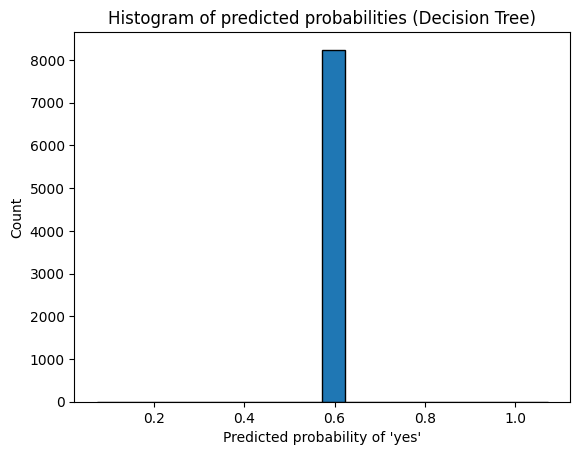

In [78]:
import matplotlib.pyplot as plt

plt.hist(probs, bins=20, edgecolor='k')
plt.xlabel("Predicted probability of 'yes'")
plt.ylabel("Count")
plt.title("Histogram of predicted probabilities (Decision Tree)")
plt.show()


**Meaning of the Plot**

Almost all predicted probabilities are clustered at a single value (about 0.6) for the "yes" class.

Why does this happen with Decision Trees?
Decision Trees (especially shallow trees) assign the same probability to every sample in a leaf node.

In [81]:
# Use a higher threshold (e.g., 0.7 instead of 0.5)
custom_thresh = 0.6
y_pred_thresh = (probs >= custom_thresh).astype(int)
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))

Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Lets check for Logistic Regression Coefficients Probability**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


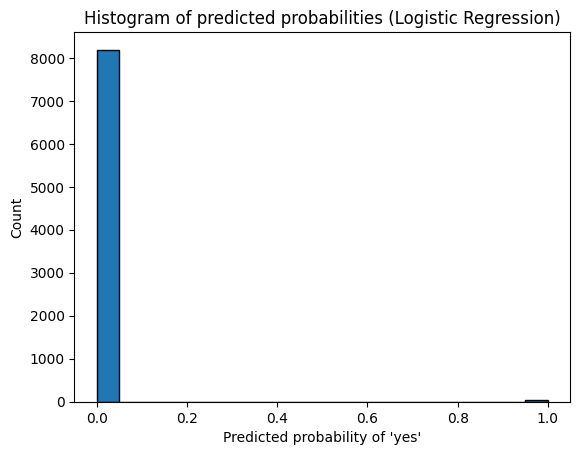

In [82]:
probs_lr = best_lr.predict_proba(X_test)[:, 1]
plt.hist(probs_lr, bins=20, edgecolor='k')
plt.xlabel("Predicted probability of 'yes'")
plt.ylabel("Count")
plt.title("Histogram of predicted probabilities (Logistic Regression)")
plt.show()


Logistic Regression Probabilities are also not spread out. So both are very extreme models.

**Next Step can be to check out Random Forest for Smoother Spread.**


##### Questions